In [ ]:
'''
1. 시각적으로 표현할 분석 소주제 5개 이상 선정
2. 전처리(결측/이상/중복) 모두 처리 진행
    - 이상치 계산 가능한 데이터는 계산하여 이상데이터 확인
3. 주제별 시각화 그래프 2개 이상
4. 주제별 분석내용 작성 : 개인별로 작성
5. 제출 : 분석내용 + 가공데이터파일 + ipynb 파일
    - 제출 형식 : 모두 압축해서 본인이름.zip
    - 제출 위치 : 구글드라이브 > 3_산출물 > 1_심평원분석
6. 문제해결 : 조별로 스터디 하면서 해결
'''

In [1]:
import pandas as pd

### 데이터 불러오기

In [2]:
# 파일 불러오기
file_path = './files_new2/df_kor2_20table_명세서일반내역.xlsx'
df20 = pd.read_excel(file_path)
df20

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,1,9430,2800,6630,0,$,$,$,$,30796
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,1,4380,500,3880,0,$,$,$,$,9795
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,1,3310,1300,2010,0,$,$,$,$,34835
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,1,26660,7900,18760,0,$,$,$,$,35538
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,1,9430,2800,6630,0,$,$,$,$,4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9,2,...,1,13310,3900,9410,0,$,$,$,$,21762
5627,5628,295,3,0,3,4,0.030001,33.332721,20,1,...,1,71310,3500,67810,0,V193,$,$,$,45362
5628,5629,246,3,0,3,1,0.030000,33.333050,4,1,...,1,13820,2900,10920,0,$,$,$,$,12083
5629,5630,253,3,0,3,10,0.030000,33.332913,47,2,...,1,9430,2800,6630,0,$,$,$,$,21067


In [75]:
# 필요한 컬럼 조회
df20_c = df20[['명세서 연결코드', '수진자고유번호', '수진자연령', '성별구분코드', '요양개시일자', \
               '수술여부', '심결본인부담금', '심결보험자부담금', '심결요양급여비용총액',\
               '진료과목코드']]
df20_c

,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액,진료과목코드
0,1,169,62,1,20130108,0,2800,6630,9430,1
1,2,183,74,2,20130212,0,500,3880,4380,0
2,3,23,14,1,20130222,0,1300,2010,3310,3
3,4,96,68,1,20130608,0,7900,18760,26660,54
4,5,28,19,1,20131128,0,2800,6630,9430,1
...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,9,2,20131001,0,3900,9410,13310,56
5627,5628,295,20,1,20130423,0,3500,67810,71310,1
5628,5629,246,4,1,20130112,0,2900,10920,13820,11
5629,5630,253,47,2,20130401,0,2800,6630,9430,5


### 결측치, 이상치 확인 및 처리

In [4]:
df20_c.info()
df20_c.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   명세서 연결코드    5631 non-null   int64
 1   수진자고유번호     5631 non-null   int64
 2   수진자연령       5631 non-null   int64
 3   성별구분코드      5631 non-null   int64
 4   요양개시일자      5631 non-null   int64
 5   수술여부        5631 non-null   int64
 6   심결본인부담금     5631 non-null   int64
 7   심결보험자부담금    5631 non-null   int64
 8   심결요양급여비용총액  5631 non-null   int64
dtypes: int64(9)
memory usage: 396.1 KB


,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액
count,5631.000000,5631.000000,5631.000000,5631.000000,5.631000e+03,5631.000000,5.631000e+03,5.631000e+03,5.631000e+03
mean,2816.000000,166.294974,47.783520,1.491387,2.013067e+07,0.187001,1.076908e+04,4.101253e+04,5.185643e+04
std,1625.674014,94.674305,23.707225,0.499970,3.467375e+02,1.283872,6.282138e+04,3.138938e+05,3.590136e+05
min,1.000000,1.000000,2.000000,1.000000,2.013010e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1408.500000,83.000000,32.000000,1.000000,2.013040e+07,0.000000,1.800000e+03,7.890000e+03,1.103500e+04
50%,2816.000000,174.000000,56.000000,1.000000,2.013070e+07,0.000000,3.900000e+03,1.039000e+04,1.382000e+04
75%,4223.500000,256.000000,67.000000,2.000000,2.013101e+07,0.000000,7.000000e+03,1.591500e+04,2.305500e+04
max,5631.000000,320.000000,94.000000,2.000000,2.013123e+07,9.000000,3.461590e+06,1.338616e+07,1.413802e+07


In [5]:
# 남: 1 , 여: 2
df20_c['성별구분코드'].unique()

array([1, 2], dtype=int64)

In [6]:
# 0: 비수술, 9: 수술
df20_c['수술여부'].unique()

array([0, 9], dtype=int64)

In [7]:
# 극단치 계산 함수
import numpy as np

def outliers(data) :
    q1, q3 = np.percentile(data, [25,75])
    IQR = q3 - q1
    upper_bound = q3 + (1.5*IQR)
    lower_bound = q1 - (1.5*IQR)
    outlier = df20_c[(data > upper_bound) | (data < lower_bound)]
    return outlier

In [8]:
outliers(df20_c['심결본인부담금'])

,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액
19,20,318,58,1,20131210,0,15700,23620,39320
33,34,280,77,2,20130430,0,17600,17650,35250
38,39,60,76,2,20130128,0,70490,226070,296560
40,41,230,45,2,20130105,9,15600,36460,52060
41,42,180,55,1,20130112,0,15200,137600,152800
...,...,...,...,...,...,...,...,...,...
5594,5595,12,36,1,20130730,0,15700,36860,52560
5597,5598,180,56,1,20130831,0,15200,137600,152800
5598,5599,122,62,1,20130715,0,20400,47810,68210
5623,5624,265,57,2,20130513,0,45700,68700,114400


In [9]:
outliers(df20_c['심결보험자부담금'])

,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액
38,39,60,76,2,20130128,0,70490,226070,296560
40,41,230,45,2,20130105,9,15600,36460,52060
41,42,180,55,1,20130112,0,15200,137600,152800
44,45,285,44,2,20130504,0,18200,42550,60750
46,47,171,35,1,20130118,0,12400,28940,41340
...,...,...,...,...,...,...,...,...,...
5617,5618,231,51,2,20130521,0,3800,72770,76570
5618,5619,127,45,1,20130604,0,13900,32550,46450
5623,5624,265,57,2,20130513,0,45700,68700,114400
5624,5625,105,59,2,20130123,0,16600,39020,55620


In [ ]:
'''
극단치 계산 결과 극단치를 벗어나는 이상치가 존재하나

금액에 있어서 안될 수치나 -값이 없고 
진료별 금액이 상이한 경우가 많기 때문에 일단 제거하지 않고 분석 진행
'''

In [10]:
df20_c[df20_c.duplicated()]

,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액


### 필요한 컬럼 생성

#### 연령대 생성

In [157]:
df20_c['연령대'] = 'x'

for j in range(0, 100, 10) : 
    if j == 0 :
        row_index = df20_c.index[df20_c['수진자연령'] < j+10]
        df20_c.loc[row_index, '연령대'] = '9세이하'


    if j >= 10 :
        row_index = df20_c.index[(df20_c['수진자연령'] >= j) & (df20_c['수진자연령'] < j+10)]
        df20_c.loc[row_index, '연령대'] = '{}대'.format(j)
        
df20_c

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\1175430288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20_c['연령대'] = 'x'


,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액,진료과목코드,연령대
0,1,169,62,1,20130108,0,2800,6630,9430,1,60대
1,2,183,74,2,20130212,0,500,3880,4380,0,70대
2,3,23,14,1,20130222,0,1300,2010,3310,3,10대
3,4,96,68,1,20130608,0,7900,18760,26660,54,60대
4,5,28,19,1,20131128,0,2800,6630,9430,1,10대
...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,9,2,20131001,0,3900,9410,13310,56,9세이하
5627,5628,295,20,1,20130423,0,3500,67810,71310,1,20대
5628,5629,246,4,1,20130112,0,2900,10920,13820,11,9세이하
5629,5630,253,47,2,20130401,0,2800,6630,9430,5,40대


#### 요양개시월 생성

In [158]:
df20_c['요양개시월'] = df20_c['요양개시일자'].astype(str).str[4:6]
df20_c

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\2396185876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20_c['요양개시월'] = df20_c['요양개시일자'].astype(str).str[4:6]


,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액,진료과목코드,연령대,요양개시월
0,1,169,62,1,20130108,0,2800,6630,9430,1,60대,01
1,2,183,74,2,20130212,0,500,3880,4380,0,70대,02
2,3,23,14,1,20130222,0,1300,2010,3310,3,10대,02
3,4,96,68,1,20130608,0,7900,18760,26660,54,60대,06
4,5,28,19,1,20131128,0,2800,6630,9430,1,10대,11
...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,9,2,20131001,0,3900,9410,13310,56,9세이하,10
5627,5628,295,20,1,20130423,0,3500,67810,71310,1,20대,04
5628,5629,246,4,1,20130112,0,2900,10920,13820,11,9세이하,01
5629,5630,253,47,2,20130401,0,2800,6630,9430,5,40대,04


In [60]:
df20_c['수술여부_더미'] = df20_c['수술여부']/9

C:\Users\admin\AppData\Local\Temp\ipykernel_6548\821531711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df20_c['수술여부_더미'] = df20_c['수술여부']/9


In [62]:
df20_c['수술여부_더미'].unique()

array([0., 1.])

### 성별, 연령별, 월별에 따른 수술여부 현황

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

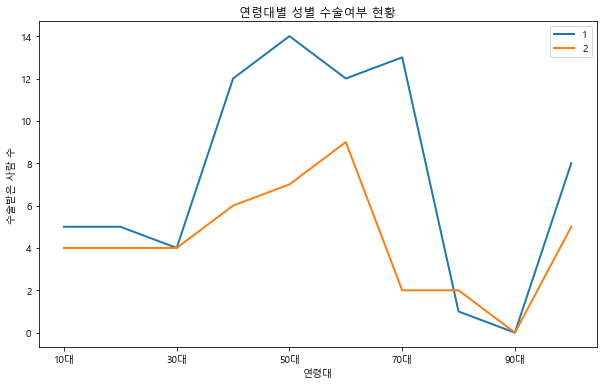

In [67]:
# 연령대별 성별 수술여부 현황
pivot_09_age_sex = df20_c.pivot_table(values = '수술여부_더미', index = '연령대', columns = '성별구분코드', aggfunc = 'sum')
pivot_09_age_sex = pivot_09_age_sex.fillna(0)
pivot_09_age_sex

plt.rcParams['figure.figsize'] = (10,6)
pivot_09_age_sex.plot()

plt.title('연령대별 성별 수술여부 현황')
plt.ylabel('수술받은 사람 수')
plt.legend(loc='upper right')
plt.show()

In [ ]:
'''
연령대별, 성별 수술여부 현황을 살펴보면 50, 60대에서 큰 차이를 확인할 수 있다.
50대는 남자가, 60대는 여자가 수술 비율이 매우 높은 것으로 확인된다.
또한 다른 연령대(10대~40대, 80대~90대)에 배해 9세이하의 수술 비율이 높게 나타났다.
반면 80대~90대의 경우 수술 비율이 매우 적은 것으로 나타났다.
'''

### 수술여부 및 연령별에 따른 의료비용 현황

In [ ]:
# 수술여부 및 연령별에 따른 의료비용 현황
'''
수술여부 및 연령별에 따른 부담금을 알아보기 위해
진료과목별 요양급여비총액 현황 파악이 우선되어야 한다
** 금액별 편차가 크기 때문에 진료과목별 금액 파악이 필요함
'''

In [94]:
file_path = './files_new2/표본자료 변수 테이블(2012-2013).xlsx'
df20_hcode = pd.read_excel(file_path, sheet_name = '표1.표2.표3.표4.', usecols='B,C', skiprows=[0,1], skipfooter=33)
df20_hcode.columns = ['진료과목코드','진료과목']
df20_hcode

,진료과목코드,진료과목
0,0,일반의
1,1,내과
2,2,신경과
3,3,정신과
4,4,외과
5,5,정형외과
6,6,신경외과
7,7,흉부외과
8,8,성형외과
9,9,마취통증의학과


In [159]:
df20_merge = pd.merge(df20_c,df20_hcode)
df20_merge

,명세서 연결코드,수진자고유번호,수진자연령,성별구분코드,요양개시일자,수술여부,심결본인부담금,심결보험자부담금,심결요양급여비용총액,진료과목코드,연령대,요양개시월,진료과목
0,1,169,62,1,20130108,0,2800,6630,9430,1,60대,01,내과
1,5,28,19,1,20131128,0,2800,6630,9430,1,10대,11,내과
2,12,115,6,1,20130129,0,2800,6630,9430,1,9세이하,01,내과
3,15,256,35,2,20130930,0,2800,6630,9430,1,30대,09,내과
4,18,267,53,1,20130125,0,10300,24250,34550,1,50대,01,내과
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,1907,261,28,2,20130326,0,7400,17340,24740,16,20대,03,영상의학과
5627,2921,312,69,2,20131030,0,1500,7930,9430,16,60대,10,영상의학과
5628,4975,218,41,1,20130902,0,18100,42350,60450,16,40대,09,영상의학과
5629,5566,312,69,2,20131012,0,0,0,0,16,60대,10,영상의학과


### 진료 순위 top10 (사람들이 진료를 많이 본 과목)

In [184]:
# 사람들이 진료를 많이 본 과목
df20_merge['진료과목'].value_counts().sort_values(ascending=False).head(5)

내과        1808
정형외과       755
소아청소년과     468
이비인후과      358
피부과        269
Name: 진료과목, dtype: int64

#### 성별, 연령대에 따른 진료과목

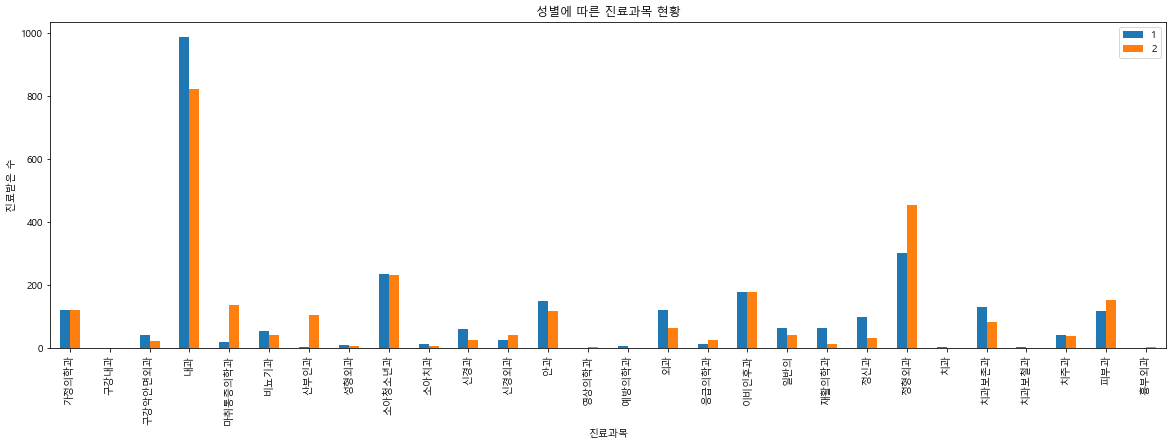

In [249]:
# 성별에 따른 진료과목 현황
pivot_sex_age_m = df20_merge.pivot_table(values = '명세서 연결코드', index = '진료과목', columns = '성별구분코드', aggfunc = 'count')
pivot_sex_age_m = pivot_sex_age_m.fillna(0)

plt.rcParams['figure.figsize'] = (20,6)
pivot_sex_age_m.plot.bar()

plt.title('성별에 따른 진료과목 현황')
plt.ylabel('진료받은 수')
plt.legend(loc='upper right')

plt.show()

In [ ]:
'''
진료과목이 내과, 정형외과, 소아청소년과, 이비인후과, 피부과 순으로 진료 받은 수가 많았다.

진료수가 가장 많은 내과에서는 남자가, 정형외과는 여자가 진료를 많이 받았다.
반면 소아청소년과, 이비인후과는 남녀에 따른 차이가 보이지 않는다.
'''

In [207]:
pivot_sex_age_m

성별구분코드,1,2
진료과목,,
가정의학과,121.0,120.0
구강내과,0.0,1.0
구강악안면외과,43.0,21.0
내과,986.0,822.0
마취통증의학과,18.0,136.0
비뇨기과,54.0,41.0
산부인과,4.0,104.0
성형외과,10.0,7.0
소아청소년과,235.0,233.0


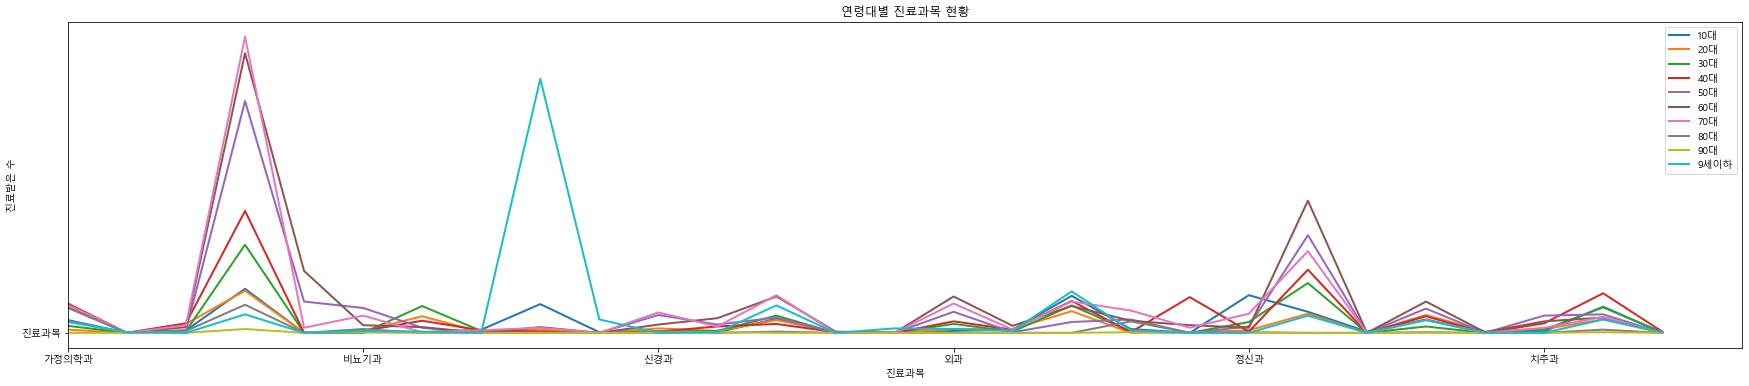

In [252]:
# 연령별에 따른 진료과목 현황
pivot_age_m = df20_merge.pivot_table(values = '명세서 연결코드', index = '진료과목', columns = '연령대', aggfunc = 'count')
pivot_age_m = pivot_age_m.fillna(0)

plt.rcParams['figure.figsize'] = (30,6)
pivot_age_m.plot()
plt.barh('진료과목','연령대')

plt.title('연령대별 진료과목 현황')
plt.ylabel('진료받은 수')
plt.legend(loc='upper right')

plt.show()

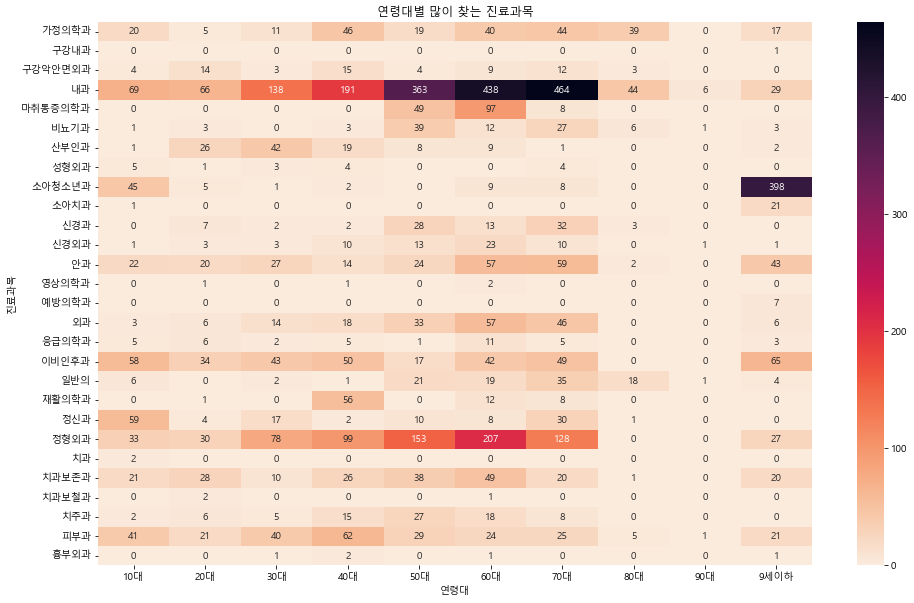

In [251]:
plt.figure(figsize = (16,10))
sns.heatmap(pivot_age_m, annot=True, fmt = '.0f', cmap='rocket_r')
plt.title('연령대별 많이 찾는 진료과목')
plt.show()

### 진료과목별 부담금 현황

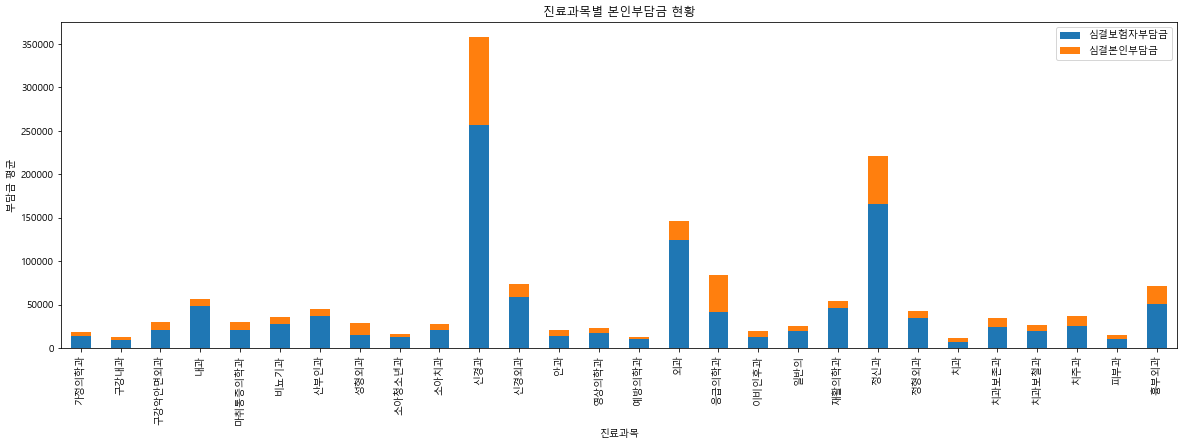

In [204]:
# 진료과목별 본인부담금 현황
pivot_pay_m = df20_merge.pivot_table(values = ['심결본인부담금','심결보험자부담금'], index = '진료과목', aggfunc = 'mean')
pivot_pay_m = pivot_pay_m.fillna(0)

plt.rcParams['figure.figsize'] = (20,6)
pivot_pay_m.plot.bar(stacked=True)

plt.title('진료과목별 본인부담금 현황')
plt.ylabel('부담금 평균')
plt.legend(loc='upper right')

plt.show()

#### 진료과목별 본인부담금 현황

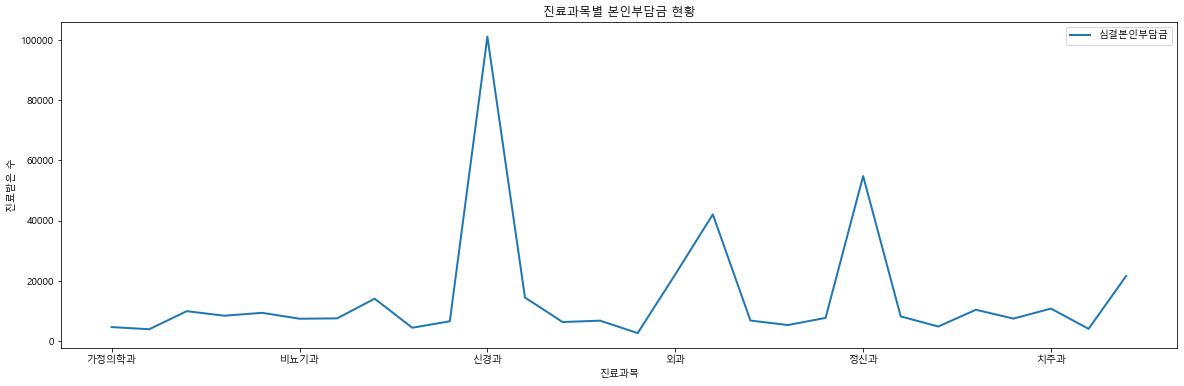

In [209]:
# 진료과목별 본인부담금 현황
pivot_pay_m1 = df20_merge.pivot_table(values = '심결본인부담금', index = '진료과목', aggfunc = 'mean')
pivot_pay_m1 = pivot_pay_m1.fillna(0)

plt.rcParams['figure.figsize'] = (20,6)
pivot_pay_m1.plot()

plt.title('진료과목별 본인부담금 현황')
plt.ylabel('진료받은 수')
plt.legend(loc='upper right')

plt.show()

#### 진료과목별 보험자부담금 현황

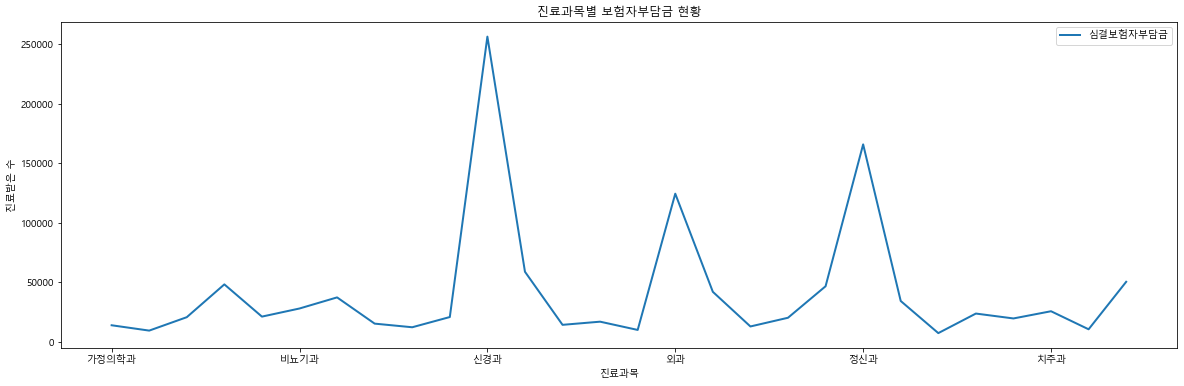

In [190]:
# 진료과목별 보험자부담금 현황
pivot_pay_m2 = df20_merge.pivot_table(values = '심결보험자부담금', index = '진료과목', aggfunc = 'mean')
pivot_pay_m2 = pivot_pay_m2.fillna(0)

plt.rcParams['figure.figsize'] = (20,6)
pivot_pay_m2.plot()

plt.title('진료과목별 보험자부담금 현황')
plt.ylabel('진료받은 수')
plt.legend(loc='upper right')

plt.show()